In [1]:
# -*- coding: utf-8 -*-
'''VGG16 model for Keras.

# Reference:

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

'''
from __future__ import print_function
import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs
from google.colab import drive
drive.mount('/content/drive/')
root='/content/drive/My Drive/CNN_Basic/'

Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
def VGG16(include_top=True, input_shape=None,classes=8):
    
    
    img_input = Input(shape=input_shape)
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(1024, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    model = Model(img_input, x, name='vgg16')
    model.summary()
    # load weights
    #weights_path = root+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
    #model.load_weights(weights_path)
    
    return model

In [3]:
model = VGG16(include_top=True,input_shape=[224,224,3],classes=8)
weights_path = root+'vgg16_weights_tf_dim_ordering_tf_kernels.h5'
#model.load_weights(weights_path)
    

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [4]:
import h5py
def load_wts(model):
  f = h5py.File(weights_path, 'r')
  print(list(f.keys()))
  #f['block1_conv1']['block1_conv1_W_1:0'].shape
  #model.get_layer('block1_conv1').get_weights()[1].shape

  layers=list(f.keys())
  for layer in layers:
    if layer[:5]=='block':
      l_type=layer.split('_')[1][:4]
    else:
      l_type=layer
    #print(l_type)
    if l_type =='conv':
      wts=f[layer][layer+'_W_1:0']
      bs=f[layer][layer+'_b_1:0']

      temp_layer=model.get_layer(layer)

      temp_layer.set_weights([wts,bs])
      #temp_layer.set_biases(bs)

      print('layer',layer,'type',l_type)
  return model
  #block1_conv1_W_1:0
  #block1_conv1_b_1:0
model=load_wts(model)

['block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'fc1', 'fc2', 'flatten', 'predictions']
layer block1_conv1 type conv
layer block1_conv2 type conv
layer block2_conv1 type conv
layer block2_conv2 type conv
layer block3_conv1 type conv
layer block3_conv2 type conv
layer block3_conv3 type conv
layer block4_conv1 type conv
layer block4_conv2 type conv
layer block4_conv3 type conv
layer block5_conv1 type conv
layer block5_conv2 type conv
layer block5_conv3 type conv


In [0]:
import glob
classes=[]
for fname in glob.glob(root+'images/*'):
  clss=fname.split('/')[-1]
  classes.append(clss)

In [0]:
fnames=[]
labels=[]
for name in classes:
  path=root+'images/'+name
  for fname in glob.glob(path+'/*'):
    fnames.append(fname)
    labels.append(name)

In [7]:
classes

['motorbike', 'person', 'dog', 'airplane', 'flower', 'cat', 'fruit', 'car']

In [0]:
import pandas as pd
import cv2
df=pd.DataFrame([fnames,labels],index=['path','label']).transpose()
df=df.sample(frac=1,random_state=10).reset_index(drop=True)
n=len(df)
split=int(0.8*n)
train_data=df.loc[:split]
val_data=df.loc[split:].reset_index(drop=True)


def get_data(data):
  X=[]
  Y=[]
  for i in range(len(data)):
      print(i)
      path=data.loc[i,'path']
      label=data.loc[i,'label']
      lbl=np.zeros(len(classes))
      ind=classes.index(label)
      lbl[ind]=1
      img=cv2.imread(path)
      img=cv2.resize(img,(224,224))
      X.append(img)
      Y.append(lbl)
  return X,Y


def data_batch(df,b_size):
  trainX=[]
  trainY=[]
  for i in range(n):
    trainX.append(train_data.loc[i,'path'])
    trainY.append(train_data.loc[i,'label'])
    if (i+1)%b_size==0:
      yield trainX,trainY
      trainX=[]
      trainY=[]

In [0]:
#train_batch=data_batch(train_data,200)
#val_batch=data_batch(val_data,200)

In [0]:
save=False
if save==True:
  trainX,trainY=get_data(train_data)
  valX,valY=get_data(val_data)
  import pickle
  f=open(root+'_trainXY','wb')
  pickle.dump([trainX,trainY],f)
  f.close()
  import pickle
  f=open(root+'_valXY','wb')
  pickle.dump([valX,valY],f)
  f.close()


In [0]:
import pickle
f=open(root+'_trainXY','rb')
[trainX,trainY]=pickle.load(f)
f.close()

import pickle
f=open(root+'_valXY','rb')
[valX,valY]=pickle.load(f)
f.close()

trainX=np.array(trainX)
trainY=np.array(trainY)
valX=np.array(valX)
valY=np.array(valY)

In [12]:
trainX[3].shape,len(valX)
trainY[6]

array([0., 0., 1., 0., 0., 0., 0., 0.])

In [0]:
train=False
if train==True:
  from keras import optimizers
  opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  history=model.fit(trainX,trainY,batch_size=100,epochs=15,validation_data=(valX,valY),shuffle=True)
  '''
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)
  '''

In [0]:
#model.save(root+'vgg16_trained_wts_8_class_15_epoch.h5')
model.load_weights(root+'vgg16_trained_wts_8_class_15_epoch.h5')

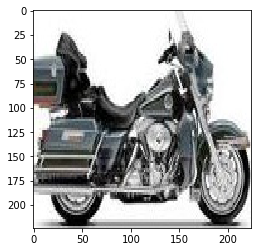

Input image shape: (1, 224, 224, 3)
Predicted: motorbike


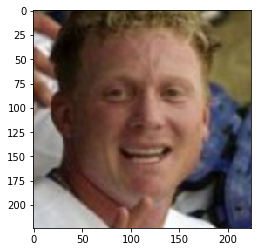

Input image shape: (1, 224, 224, 3)
Predicted: person


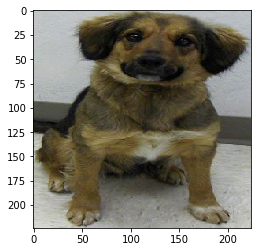

Input image shape: (1, 224, 224, 3)
Predicted: dog


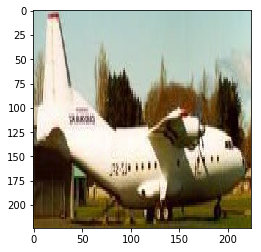

Input image shape: (1, 224, 224, 3)
Predicted: airplane


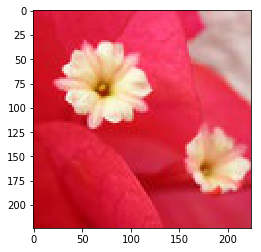

Input image shape: (1, 224, 224, 3)
Predicted: flower


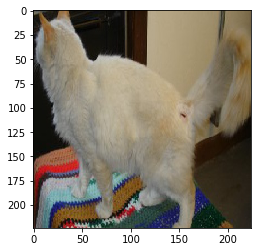

Input image shape: (1, 224, 224, 3)
Predicted: cat


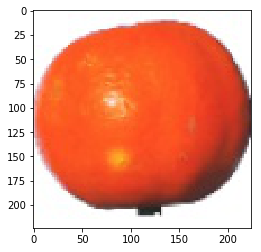

Input image shape: (1, 224, 224, 3)
Predicted: fruit


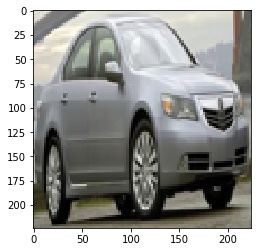

Input image shape: (1, 224, 224, 3)
Predicted: car


In [15]:
from matplotlib import pyplot as plt
for obj in classes:
    #model = VGG16(include_top=True, weights='imagenet',input_shape=[224,224,3])

    img_path = root+'images/'+obj+'/'+obj+'_0003.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    print('Input image shape:', x.shape)
    
    preds = model.predict(x)
    ind=np.argmax(preds)
    pred=classes[ind]
    print('Predicted:',pred )


In [0]:
preds = model.predict(valX)

In [19]:
right=0
wrong=0
for i in range(len(preds)):
  if np.argmax(preds[i])==np.argmax(valY[i]):
    right+=1
  else:
    wrong+=1
right,wrong
acc=right/(len(preds))
print('right',right,'wrong',wrong,'accuracy  : ',acc)
#(1246, 134)
#(1256, 124)
#(1296, 84)
#(1328, 52)

right 1328 wrong 52 accuracy  :  0.9623188405797102
